# Task Assignment Optimization Problem with Gurobi Framework

_by: TK-Bunga Matahari Team_

---

# 0. The Obligatory Part


In [1]:
# Import library
import os
import pandas as pd
import gurobipy as gp
import matplotlib.pyplot as plt
from gurobipy import GRB, quicksum
from competency_assessment import CompetencyAssessment

# 1. Define the Data Structure


In [2]:
license_file_path = "./data/gurobi.lic"

# Full Data?
full = False

# Run this if the data in Local/Repository
if full:
	new_employee_path = "./data/fixed_data_employee.csv"
	new_task_path = "./data/fixed_data_task.csv"
else:
	new_employee_path = "./mini_data/mini_data - employee.csv"
	new_task_path = "./mini_data/mini_data - task.csv"

## 1.1. Pre-Processing: Employee Data


In [3]:
# Read data
employee_skills_df = pd.read_csv(new_employee_path, index_col="employee_id")
employee_skills_df.drop(columns=["No", "Role"], inplace=True, errors="ignore")

employees = employee_skills_df.index.tolist()
skills_name = employee_skills_df.columns[1:].tolist()

employee_skills_df

,math,python,sql,cloud,database,optimization
employee_id,,,,,,
Talent 1,5,5,3,2,2,5
Talent 2,2,5,4,3,3,1
Talent 3,4,4,5,3,4,3
Talent 4,3,4,5,5,4,2
Talent 5,2,3,2,4,5,1


## 1.2. Pre-Processing: Task Data


In [4]:
task_df = pd.read_csv(new_task_path, index_col="task_id")

tasks = task_df.index.tolist()
company_names = list(set(task_df["project_id"]))
story_points = task_df["story_points"].to_dict()

task_df

,project_id,story_points,math,python,sql,cloud,database,optimization
task_id,,,,,,,,
T1,P2,1,0,5,3,4,4,0
T2,P1,2,3,5,4,5,3,1
T3,P2,3,5,4,2,0,0,5
T4,P3,5,2,4,0,3,0,4
T5,P3,1,0,3,5,1,5,0
T6,P1,1,0,1,4,5,5,0
T7,P3,2,4,4,1,1,2,3
T8,P1,3,1,0,5,5,3,0
T9,P2,1,3,4,3,0,0,2


## 1.3. Group the task data by company/project


In [5]:
# convert to dictionary each company and its task
company_tasks = {}

for company in company_names:
    company_tasks[company] = task_df[task_df["project_id"] == company].index.tolist()

# sort the company tasks from C1 to C5
company_tasks = dict(sorted(company_tasks.items()))

company_tasks_df = pd.DataFrame.from_dict(company_tasks, orient="index")
company_tasks_df

,0,1,2,3
P1,T2,T6,T8,T10
P2,T1,T3,T9,None
P3,T4,T5,T7,None


## 1.4. Pre-Processing: Competency Assesment

First, create RCD-ACD Dataframe that we get from Task Dataframe for RCD and from Employee Dataframe for ACD.

### 1.4.1 Required Competence Data


In [6]:
rcd_df = task_df.drop(columns=["project_id", "story_points"])
rcd_df = rcd_df.fillna(0)
rcd_df

,math,python,sql,cloud,database,optimization
task_id,,,,,,
T1,0,5,3,4,4,0
T2,3,5,4,5,3,1
T3,5,4,2,0,0,5
T4,2,4,0,3,0,4
T5,0,3,5,1,5,0
T6,0,1,4,5,5,0
T7,4,4,1,1,2,3
T8,1,0,5,5,3,0
T9,3,4,3,0,0,2


### 1.4.2 Acquired Competence Data


In [7]:
# create a copy of the original DataFrame
acd_df = employee_skills_df.copy()
acd_df = acd_df.fillna(0)
acd_df

,math,python,sql,cloud,database,optimization
employee_id,,,,,,
Talent 1,5,5,3,2,2,5
Talent 2,2,5,4,3,3,1
Talent 3,4,4,5,3,4,3
Talent 4,3,4,5,5,4,2
Talent 5,2,3,2,4,5,1


### 1.4.3 Fit the Data


In [8]:
ca = CompetencyAssessment(rcd_df, acd_df)
qs, info = ca.fit()

### 1.4.4 Qualification Space


In [9]:
qs

{'Talent 1': {'T1': [0.0, -1.0, -0.16666666666666666, 'Under-Qualified'],
  'T2': [0.4761904761904761,
   -1.0476190476190477,
   -0.09523809523809527,
   'Under-Qualified'],
  'T3': [0.375, 0, 0.0625, 'Qualified'],
  'T4': [1.076923076923077,
   -0.23076923076923073,
   0.14102564102564105,
   'Qualified'],
  'T5': [0.5, -1.785714285714286, -0.21428571428571433, 'Under-Qualified'],
  'T6': [0.26666666666666666,
   -2.2666666666666666,
   -0.3333333333333333,
   'Under-Qualified'],
  'T7': [1.133333333333333, 0, 0.18888888888888886, 'Qualified'],
  'T8': [0.2857142857142857,
   -2.0000000000000004,
   -0.2857142857142858,
   'Under-Qualified'],
  'T9': [1.3333333333333333, 0, 0.2222222222222222, 'Qualified'],
  'T10': [0.0, 0, 0.0, 'Qualified']},
 'Talent 2': {'T1': [0.1875, -0.5, -0.052083333333333336, 'Under-Qualified'],
  'T2': [0.0, -0.6190476190476191, -0.10317460317460318, 'Under-Qualified'],
  'T3': [0.5, -2.1875, -0.28125, 'Under-Qualified'],
  'T4': [0.3076923076923077,
   -0.

### 1.4.5 Sorted MSG Score for All Tasks


In [10]:
score = ca.rank_MSG(qs)
score_for_obj2 = score
score

{'Talent 1': {'T9': 0.2222222222222222,
  'T7': 0.18888888888888886,
  'T4': 0.14102564102564105,
  'T3': 0.0625,
  'T10': 0.0,
  'T2': -0.09523809523809527,
  'T1': -0.16666666666666666,
  'T5': -0.21428571428571433,
  'T8': -0.2857142857142858,
  'T6': -0.3333333333333333},
 'Talent 2': {'T9': 0.027777777777777773,
  'T7': -0.033333333333333326,
  'T1': -0.052083333333333336,
  'T5': -0.08333333333333337,
  'T4': -0.10256410256410257,
  'T2': -0.10317460317460318,
  'T8': -0.1666666666666667,
  'T6': -0.17777777777777773,
  'T3': -0.28125,
  'T10': -0.38888888888888884},
 'Talent 3': {'T9': 0.1527777777777778,
  'T7': 0.11111111111111112,
  'T4': 0.0,
  'T5': -9.25185853854297e-18,
  'T2': -0.023809523809523836,
  'T1': -0.03125,
  'T8': -0.04761904761904764,
  'T6': -0.08888888888888886,
  'T3': -0.09375,
  'T10': -0.22222222222222218},
 'Talent 4': {'T9': 0.08333333333333333,
  'T8': 0.05952380952380953,
  'T7': 0.05555555555555556,
  'T1': 0.052083333333333336,
  'T2': 0.023809523

## 1.5. Pre-Processing: Get the License of Gurobi

In [11]:
def read_license_file(filepath):
    params = {}
    with open(filepath, "r") as file:
        for line in file:
            if line.startswith("WLSACCESSID"):
                params["WLSACCESSID"] = line.split("=")[1].strip()
            elif line.startswith("WLSSECRET"):
                params["WLSSECRET"] = line.split("=")[1].strip()
            elif line.startswith("LICENSEID"):
                params["LICENSEID"] = int(line.split("=")[1].strip())
    return params

params = read_license_file(license_file_path)

# 2. Construct the Model

## 2.1. Get the License and Create a Model

In [12]:
# Create an environment with WLS license
params = {
    "WLSACCESSID": params["WLSACCESSID"],
    "WLSSECRET": params["WLSSECRET"],
    "LICENSEID": params["LICENSEID"],
}
env = gp.Env(params=params)

# Create the model within the Gurobi environment
model = gp.Model(name="task_assignment", env=env)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2521640
Academic license 2521640 - for non-commercial use only - registered to na___@mail.ugm.ac.id


## 2.2. Set Tune Parameters

In [13]:
# Set Gurobi parameters to improve performance
model.setParam("Presolve", 2)  # Aggressive presolve
model.setParam("MIPFocus", 1)  # Focus on improving the best bound
model.setParam("MIPGap", 0.01)  # 1% optimality gap
model.setParam("Heuristics", 0.1)  # Increase heuristics effort
# model.setParam("Threads", 8)  # Use 8 threads, adjust based on your CPU

Set parameter Presolve to value 2
Set parameter MIPFocus to value 1
Set parameter MIPGap to value 0.01
Set parameter Heuristics to value 0.1


## 2.3. Create a Callback

In [14]:
class GapCallback:
    def __init__(self):
        self.reported_gaps = set()

    def __call__(self, model, where):
        if where == GRB.Callback.MIP:
            nodecount = model.cbGet(GRB.Callback.MIP_NODCNT)
            if (
                nodecount % 100 == 0
            ):  # Adjust the frequency of the callback call if needed
                obj_best = model.cbGet(GRB.Callback.MIP_OBJBST)
                obj_bound = model.cbGet(GRB.Callback.MIP_OBJBND)
                if obj_best < GRB.INFINITY and obj_bound > -GRB.INFINITY:
                    gap = abs((obj_bound - obj_best) / obj_best) * 100
                    percentage_gap = gap

                    # Report gap for multiples of 5
                    if percentage_gap > 10 and int(percentage_gap) % 5 == 0:
                        if int(percentage_gap) not in self.reported_gaps:
                            print(f"Model reached {int(percentage_gap)}% gap.")
                            self.reported_gaps.add(int(percentage_gap))

                    # Report gap for each integer when gap <= 10
                    elif percentage_gap <= 10:
                        if int(percentage_gap) not in self.reported_gaps:
                            print(f"Model reached {int(percentage_gap)}% gap.")
                            self.reported_gaps.add(int(percentage_gap))

# 3. Build the Decision Variable

We have 3 sets:

$$
\text{sets} = \begin{cases}
I &: \text{set of tasks} \\
J &: \text{set of employees} \\
K &: \text{set of projects}
\end{cases}
$$

Next, we define parameters, scalars, and data structures. Let:

$$
\begin{align*}
i & = \text{task } i \\
j & = \text{employee } j \\
k & = \text{project } k \\
s_i & = \text{story points of task } i \\
e_{ij} & = \text{similarity skills of employee } j \text{ for task } i \\
\mu_{Z_n} & = \text{Objective} n {Function}\\
\mu_{Z_n^{\ast}} & = \text{Goal of each Objective Function} \\
d_{n}^+ & = \text{Overachievement of each objective} \\
d_{n}^- & = \text{Underachievement of each objective} \\
W & = \text{Weight priority of each objective}
\end{align*}
$$

**Decision Variables:**

$$
\begin{align*}
x_{ijk} & = \text{Binary variable indicate the employee } j \text{ is assigned to task } i \text{ in project } k \\
y_{jk} & = \text{Binary variable indicate the employee } j \text{ is assigned to project } k \\
z_{ij} & = \text{Binary variable indicate the task } i \text{ is assigned to employee } j \\
max\_workload & = \text{Integer variable indicate the maximum workload that can be assigned}
\end{align*}
$$


In [15]:
if full:
	max_employee_workload = 20
else:
    max_employee_workload = 8

In [16]:
# Create decision variables for x and y
x = {}
for k, task in company_tasks.items():
    for i in task:
        for j in employees:
            x[(i, j, k)] = model.addVar(vtype=GRB.BINARY, name=f"x_{i}_{j}_{k}")

# Decision variable y to represent cardinality of each employee and company
y = {}
for j in employees:
    for k in company_tasks.keys():
        y[(j, k)] = model.addVar(vtype=GRB.BINARY, name=f"y_{j}_{k}")

z = {}
for i in tasks:
	for j in employees:
		z[(i, j)] = model.addVar(vtype=GRB.BINARY, name=f"z_{i}_{j}")

# Decision variable for max workload
max_workload = model.addVar(
    vtype=GRB.INTEGER, lb=0, ub=max_employee_workload, name="max_workload"
)

# Integrate new variables
model.update()

In [17]:
print(x)
print(y)

{('T2', 'Talent 1', 'P1'): <gurobi.Var x_T2_Talent 1_P1>, ('T2', 'Talent 2', 'P1'): <gurobi.Var x_T2_Talent 2_P1>, ('T2', 'Talent 3', 'P1'): <gurobi.Var x_T2_Talent 3_P1>, ('T2', 'Talent 4', 'P1'): <gurobi.Var x_T2_Talent 4_P1>, ('T2', 'Talent 5', 'P1'): <gurobi.Var x_T2_Talent 5_P1>, ('T6', 'Talent 1', 'P1'): <gurobi.Var x_T6_Talent 1_P1>, ('T6', 'Talent 2', 'P1'): <gurobi.Var x_T6_Talent 2_P1>, ('T6', 'Talent 3', 'P1'): <gurobi.Var x_T6_Talent 3_P1>, ('T6', 'Talent 4', 'P1'): <gurobi.Var x_T6_Talent 4_P1>, ('T6', 'Talent 5', 'P1'): <gurobi.Var x_T6_Talent 5_P1>, ('T8', 'Talent 1', 'P1'): <gurobi.Var x_T8_Talent 1_P1>, ('T8', 'Talent 2', 'P1'): <gurobi.Var x_T8_Talent 2_P1>, ('T8', 'Talent 3', 'P1'): <gurobi.Var x_T8_Talent 3_P1>, ('T8', 'Talent 4', 'P1'): <gurobi.Var x_T8_Talent 4_P1>, ('T8', 'Talent 5', 'P1'): <gurobi.Var x_T8_Talent 5_P1>, ('T10', 'Talent 1', 'P1'): <gurobi.Var x_T10_Talent 1_P1>, ('T10', 'Talent 2', 'P1'): <gurobi.Var x_T10_Talent 2_P1>, ('T10', 'Talent 3', 'P1'):

# 4. Subject to the Constraint

## 4.1. Constraint 1: Each task is assigned to one employee

$$
\sum _{j\in J}\:x_{ijk}\:=\:1 \quad \forall i \in k, \: k \in K
$$


In [18]:
# constraint 1: each task assigned to one talent
for k, task in company_tasks.items():
    for i in task:
        model.addConstr(quicksum(x[(i, j, k)] for j in employees) == 1)

## 4.2. Constraint 2: Each employee works for one company at a time

Pre-Processing for Constraint 2:

$$
\sum _{i\in I_k}x_{ijk} > 0 \: \rightarrow \: y_{jk}=1 \quad \forall j\in J, \: k\in K\:
$$


In [19]:
# pre-processing constraint 2
for j in employees:
    for k, task in company_tasks.items():
        # Use quicksum to sum up x[i][j][k] for all i
        temp_sum = quicksum(x[i, j, k] for i in task)

        # Add a constraint to the model: y[j][k] is 1 if the sum of x[i][j][k] for all i is > 0, and 0 otherwise
        model.addGenConstrIndicator(y[j, k], True, temp_sum, GRB.GREATER_EQUAL, 1)
        model.addGenConstrIndicator(y[j, k], False, temp_sum, GRB.LESS_EQUAL, 0)

Main Constraint:

$$
\sum _{k\in K}y_{jk}\le 1 \quad \forall j\in J
$$


In [20]:
# create constraint 2: each employee can only work on one task
for j in employees:
    # The sum of y[j][k] for all companies (k) should be <= 1
    model.addConstr(quicksum(y[(j, k)] for k in company_tasks.keys()) <= 1)

## 4.3. Constraint 3: Employee workload doesn't exceed the capacity

Balance the workload, so the capacity of each employee is the sum of their story points, which is story points20.

$$
\sum _{i \in I} s_i \cdot x_{ijk} \le max\_employee\_workload \quad \forall j\in J, \: k\in K
$$


In [21]:
for j in employees:
    for k, tasks in company_tasks.items():
        model.addConstr(
            quicksum(story_points[i] * x[(i, j, k)] for i in tasks) <= max_employee_workload
        )

## 4.4. Constraint 4: To achieve the balance workload, set the maximum workload to be greater than or equal to the workload for each employee

$$
\text{max\_workload} \ge \sum_{i \in I} \sum_{k \in K} s_i\cdot x_{ijk}, \quad \forall j\in J\:\:
$$


In [22]:
# constraint 4: max_workload is greater than or equal to the workload of each employee
for j in employees:
    model.addConstr(
        max_workload
        >= quicksum(
            story_points[i] * x[i, j, k]
            for k, tasks in company_tasks.items()
            for i in tasks
        )
    )

## 4.5. Constraint 5: Implication Constraint for Minimizing Iterations: Ensure Valid Task Assignment and Employee Availability Across Companies

$$
x_{ijk}=1\:\rightarrow \:y_{jk}=1\:\rightarrow \:z_{ij}=1  \quad \forall i \in k, \: j \in J, \: k \in K
$$

In [23]:
# pre-processing for contraint 5 to ensure that the value of z is <= 1
for i in tasks:    
    model.addConstr(quicksum(z[(i, j)] for j in employees) <= 1)

In [24]:
for k, tasks in company_tasks.items():
    for i in tasks:             
        for j in employees:            
            model.addGenConstrIndicator(x[i, j, k], True, z[i, j], GRB.EQUAL, 1)            
            model.addGenConstrIndicator(z[i, j], True, y[j, k], GRB.EQUAL, 1)            

# 5. Single Objective Approach: 1) Minimize The Idle Employee
## 5.1. Set The Objective Model

$$
\mu _{Z_1} = min.\:\sum _{j\in \:J}\:\left(1\:-\:\sum _{k\in \:K}\:y_{jk}\right) \quad \tag{1}
$$

In [25]:
# objective 1
idle = []

for j in employees:
  idle.append(1 - quicksum(y[j, k] for k in company_tasks.keys()))

mu_Z_1 = quicksum(idle)

# single objective 1
model.setObjective(mu_Z_1, GRB.MINIMIZE)

## 5.2. Solve The Model of Objective $(1)$

In [26]:
# solve the model
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 20.04.6 LTS")

CPU model: AMD EPYC 7763 64-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Academic license 2521640 - for non-commercial use only - registered to na___@mail.ugm.ac.id
Optimize a model with 38 rows, 116 columns and 185 nonzeros
Model fingerprint: 0x2ffab895
Model has 130 general constraints
Variable types: 0 continuous, 116 integer (115 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 8e+00]
  RHS range        [1e+00, 8e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 52 rows and 0 columns
Presolve removed 0 rows and 51 columns
Presolve time: 0.01s
Presolved: 90 rows, 65 columns, 310 nonzeros
Variable types: 0 continuous, 65 integer (65 binary)
Found heuristic solution: objective 0.0000000
Root relaxation presolve

#### Generic Function

In [27]:
mu_Z_star = {i: 0.00 for i in range(1, 4)}

# Extracting and printing the results
def get_employee_tasks(
    j, company_tasks, model, score, story_points, max_employee_workload
):
    task = []
    sim = []
    comp = []
    sp = 0

    for k, tasks in company_tasks.items():
        for i in tasks:
            if x[i, j, k].X == 1:
                print(f"Task {i} assigned to Employee {j}")
                print(f"Company\t\t\t: {k}")
                print(f"Story Points\t\t: {story_points[i]}")
                print(f"Metrics score\t: {score[j][i]:.10f}\n")

                task.append(i)
                sim.append(score[j][i])
                comp.append(k)
                sp += story_points[i]

    wasted_sp = max_employee_workload - sp if sp > 0 else 0
    return comp, task, sp, wasted_sp, sim

### 5.2.1 Print The Solver Results

In [28]:
# Check and process the solution
if model.status == GRB.OPTIMAL:
    print("Solution Found!")
    print(f"Obj. Value 1 i.e. Total Idle Employees: {model.ObjVal}\n")
    mu_Z_star[1] = model.ObjVal

    x_hat_1 = {}
    for j in employees:
        result = get_employee_tasks(
            j, company_tasks, model, score, story_points, max_employee_workload
        )
        if len(result[1]) > 0:
            x_hat_1[j] = result
else:
    print("No Solution Found!")
    x_hat_1 = {}

Solution Found!
Obj. Value 1 i.e. Total Idle Employees: 0.0

Task T1 assigned to Employee Talent 1
Company			: P2
Story Points		: 1
Metrics score	: -0.1666666667

Task T3 assigned to Employee Talent 1
Company			: P2
Story Points		: 3
Metrics score	: 0.0625000000

Task T9 assigned to Employee Talent 1
Company			: P2
Story Points		: 1
Metrics score	: 0.2222222222

Task T2 assigned to Employee Talent 2
Company			: P1
Story Points		: 2
Metrics score	: -0.1031746032

Task T4 assigned to Employee Talent 3
Company			: P3
Story Points		: 5
Metrics score	: 0.0000000000

Task T5 assigned to Employee Talent 3
Company			: P3
Story Points		: 1
Metrics score	: -0.0000000000

Task T7 assigned to Employee Talent 3
Company			: P3
Story Points		: 2
Metrics score	: 0.1111111111

Task T8 assigned to Employee Talent 4
Company			: P1
Story Points		: 3
Metrics score	: 0.0595238095

Task T6 assigned to Employee Talent 5
Company			: P1
Story Points		: 1
Metrics score	: -0.1222222222

Task T10 assigned to Emplo

## 5.3. Show the Solver's Result

In [29]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Convert dictionary to DataFrame and set 'employee' as index
result_1 = pd.DataFrame.from_dict(x_hat_1, orient='index', columns=['company', 'assigned_task', 'sum_sp', 'wasted_sp', 'assessment_score'])
result_1.index.name = 'employee'

result_1

,company,assigned_task,sum_sp,wasted_sp,assessment_score
employee,,,,,
Talent 1,"[P2, P2, P2]","[T1, T3, T9]",5,3,"[-0.16666666666666666, 0.0625, 0.2222222222222..."
Talent 2,[P1],[T2],2,6,[-0.10317460317460318]
Talent 3,"[P3, P3, P3]","[T4, T5, T7]",8,0,"[0.0, -9.25185853854297e-18, 0.11111111111111112]"
Talent 4,[P1],[T8],3,5,[0.05952380952380953]
Talent 5,"[P1, P1]","[T6, T10]",4,4,"[-0.12222222222222219, -0.5]"


### 5.3.1 Statistics of The Objective

In [30]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat_1.keys()))
total_active_sp = sum(value[2] for value in x_hat_1.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 5
Total Active Employee		: 5	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 22
Total Active Story Points	: 22	100.00%
Total Wasted Story Points	: 0	0.00%



### 5.3.2. Distribution With Respect to the Assessment Score

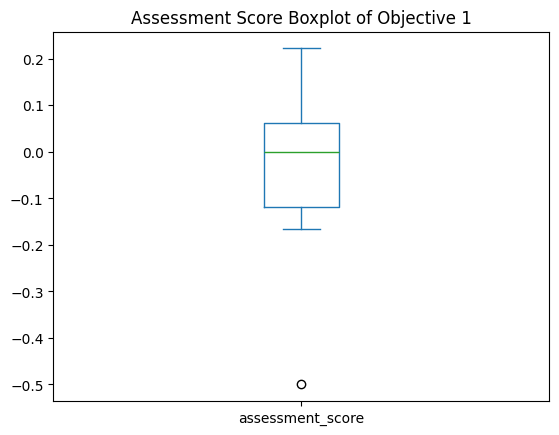

In [31]:
# make boxplot for objective 1 with respect to the assessment score
assessment_score_1 = result_1['assessment_score'].explode().reset_index(drop=True)

if len(assessment_score_1) != 0:
    assessment_score_1.plot(kind='box')
    plt.title('Assessment Score Boxplot of Objective 1')
    plt.show()
else:
    print("No data to show")

# 6. Single Objective Approach: 2) Maximize The Assessment Score
## 6.1. Set The Objective Model

$$
\mu _{Z_2} = max.\: \sum _{i\in \:I} \sum _{j\in \:J} \sum _{k\in \:K} \: e_{ij} \cdot z_{ij} \quad \tag{2}
$$

In [32]:
# objective 2
mu_Z_2 = quicksum(    
    score[j][i] * z[i, j]
    for k, tasks in company_tasks.items()
    for i in tasks
    for j in employees
)

# single objective 2
model.setObjective(mu_Z_2, GRB.MAXIMIZE)

## 6.2. Solve The Model of Objective $(2)$

In [33]:
# solve the model
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 20.04.6 LTS")

CPU model: AMD EPYC 7763 64-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Academic license 2521640 - for non-commercial use only - registered to na___@mail.ugm.ac.id
Optimize a model with 38 rows, 116 columns and 185 nonzeros
Model fingerprint: 0xd7135150
Model has 130 general constraints
Variable types: 0 continuous, 116 integer (115 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [9e-18, 5e-01]
  Bounds range     [1e+00, 8e+00]
  RHS range        [1e+00, 8e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]

Loaded MIP start from previous solve with objective -0.947817

Presolve added 52 rows and 0 columns
Presolve removed 0 rows and 51 columns
Presolve time: 0.00s
Presolved: 90 rows, 65 columns, 310 nonzeros
Found heuristic solution: objective -0.1652778
Variable typ

### 6.2.1 Print The Solver Results

In [34]:
# Check and process the solution
if model.status == GRB.OPTIMAL:
    print("Solution Found!")
    print(f"Obj. Value 2 i.e. Total Score: {model.ObjVal}\n")
    mu_Z_star[2] = model.ObjVal

    x_hat_2 = {}
    for j in employees:
        result = get_employee_tasks(
            j, company_tasks, model, score, story_points, max_employee_workload
        )
        if len(result[1]) > 0:
            x_hat_2[j] = result
else:
    print("No Solution Found!")
    x_hat_2 = {}

Solution Found!
Obj. Value 2 i.e. Total Score: 0.021527777777777868

Task T3 assigned to Employee Talent 1
Company			: P2
Story Points		: 3
Metrics score	: 0.0625000000

Task T9 assigned to Employee Talent 1
Company			: P2
Story Points		: 1
Metrics score	: 0.2222222222

Task T1 assigned to Employee Talent 2
Company			: P2
Story Points		: 1
Metrics score	: -0.0520833333

Task T4 assigned to Employee Talent 3
Company			: P3
Story Points		: 5
Metrics score	: 0.0000000000

Task T5 assigned to Employee Talent 3
Company			: P3
Story Points		: 1
Metrics score	: -0.0000000000

Task T7 assigned to Employee Talent 3
Company			: P3
Story Points		: 2
Metrics score	: 0.1111111111

Task T2 assigned to Employee Talent 4
Company			: P1
Story Points		: 2
Metrics score	: 0.0238095238

Task T8 assigned to Employee Talent 4
Company			: P1
Story Points		: 3
Metrics score	: 0.0595238095

Task T10 assigned to Employee Talent 4
Company			: P1
Story Points		: 3
Metrics score	: -0.3333333333

Task T6 assigned t

## 6.3. Show the Solver's Result

In [35]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Convert dictionary to DataFrame and set 'employee' as index
result_2 = pd.DataFrame.from_dict(x_hat_2, orient='index', columns=['company', 'assigned_task', 'sum_sp', 'wasted_sp', 'assessment_score'])
result_2.index.name = 'employee'

result_2

,company,assigned_task,sum_sp,wasted_sp,assessment_score
employee,,,,,
Talent 1,"[P2, P2]","[T3, T9]",4,4,"[0.0625, 0.2222222222222222]"
Talent 2,[P2],[T1],1,7,[-0.052083333333333336]
Talent 3,"[P3, P3, P3]","[T4, T5, T7]",8,0,"[0.0, -9.25185853854297e-18, 0.11111111111111112]"
Talent 4,"[P1, P1, P1]","[T2, T8, T10]",8,0,"[0.023809523809523798, 0.05952380952380953, -0..."
Talent 5,[P1],[T6],1,7,[-0.12222222222222219]


### 6.3.1 Statistics of The Objective

In [36]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat_2.keys()))
total_active_sp = sum(value[2] for value in x_hat_2.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 5
Total Active Employee		: 5	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 22
Total Active Story Points	: 22	100.00%
Total Wasted Story Points	: 0	0.00%



### 6.3.2. Distribution With Respect to the Assessment Score

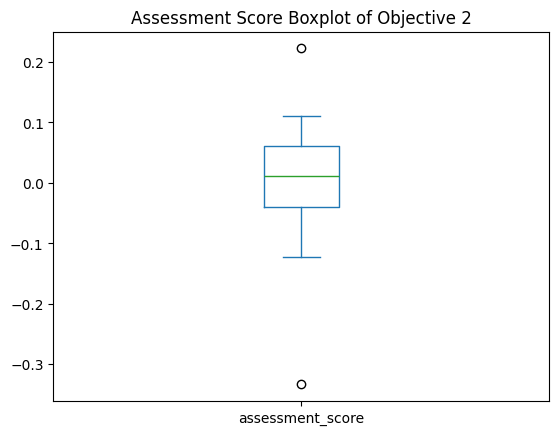

In [37]:
# make boxplot for objective 1 with respect to the assessment score
assessment_score_2 = result_2['assessment_score'].explode().reset_index(drop=True)

if len(assessment_score_2) != 0:
    assessment_score_2.plot(kind='box')
    plt.title('Assessment Score Boxplot of Objective 2')
    plt.show()
else:
    print("No data to show")

# 7. Single Objective Approach: 3) Balancing Workload For Each Employee
## 7.1. Set The Objective Model

$$
\mu_{Z_3} = min.\: \text{max\_workload} \quad \tag{3}
$$

In [38]:
# single objective 3
mu_Z_3 = max_workload
model.setObjective(mu_Z_3, GRB.MINIMIZE)

## 7.2. Solve The Model of Objective $(3)$

In [39]:
# solve the model
if full:
    gap_callback = GapCallback()
    model.setParam("MIPGap", 0.05)
    
    model.optimize(gap_callback)
else:
    model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 20.04.6 LTS")

CPU model: AMD EPYC 7763 64-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Academic license 2521640 - for non-commercial use only - registered to na___@mail.ugm.ac.id
Optimize a model with 38 rows, 116 columns and 185 nonzeros
Model fingerprint: 0x64b36b67
Model has 130 general constraints
Variable types: 0 continuous, 116 integer (115 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 8e+00]
  RHS range        [1e+00, 8e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 8

Presolve added 52 rows and 0 columns
Presolve removed 0 rows and 50 columns
Presolve time: 0.00s
Presolved: 90 rows, 66 columns, 310 nonzeros
Variable types: 0 continuous, 66 integer (65 binary)
Root relaxatio

### 7.2.1 Print The Solver Results

In [40]:
# Check and process the solution
if model.status == GRB.OPTIMAL:
    print("Solution Found!")
    print(f"Obj. Value 3 i.e. Maximum Story Points Each Employee: {model.ObjVal}\n")
    mu_Z_star[3] = model.ObjVal

    x_hat_3 = {}
    for j in employees:
        result = get_employee_tasks(
            j, company_tasks, model, score, story_points, max_employee_workload
        )
        if len(result[1]) > 0:
            x_hat_3[j] = result
else:
    print("No Solution Found!")
    x_hat_3 = {}

Solution Found!
Obj. Value 3 i.e. Maximum Story Points Each Employee: 5.0

Task T2 assigned to Employee Talent 1
Company			: P1
Story Points		: 2
Metrics score	: -0.0952380952

Task T8 assigned to Employee Talent 1
Company			: P1
Story Points		: 3
Metrics score	: -0.2857142857

Task T5 assigned to Employee Talent 2
Company			: P3
Story Points		: 1
Metrics score	: -0.0833333333

Task T7 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Metrics score	: -0.0333333333

Task T1 assigned to Employee Talent 3
Company			: P2
Story Points		: 1
Metrics score	: -0.0312500000

Task T3 assigned to Employee Talent 3
Company			: P2
Story Points		: 3
Metrics score	: -0.0937500000

Task T9 assigned to Employee Talent 3
Company			: P2
Story Points		: 1
Metrics score	: 0.1527777778

Task T6 assigned to Employee Talent 4
Company			: P1
Story Points		: 1
Metrics score	: 0.0222222222

Task T10 assigned to Employee Talent 4
Company			: P1
Story Points		: 3
Metrics score	: -0.3333333333

Task T4 

## 7.3. Show the Solver's Result

In [41]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Convert dictionary to DataFrame and set 'employee' as index
result_3 = pd.DataFrame.from_dict(x_hat_3, orient='index', columns=['company', 'assigned_task', 'sum_sp', 'wasted_sp', 'assessment_score'])
result_3.index.name = 'employee'

result_3

,company,assigned_task,sum_sp,wasted_sp,assessment_score
employee,,,,,
Talent 1,"[P1, P1]","[T2, T8]",5,3,"[-0.09523809523809527, -0.2857142857142858]"
Talent 2,"[P3, P3]","[T5, T7]",3,5,"[-0.08333333333333337, -0.033333333333333326]"
Talent 3,"[P2, P2, P2]","[T1, T3, T9]",5,3,"[-0.03125, -0.09375, 0.1527777777777778]"
Talent 4,"[P1, P1]","[T6, T10]",4,4,"[0.022222222222222227, -0.33333333333333326]"
Talent 5,[P3],[T4],5,3,[-0.16666666666666666]


### 7.3.1 Statistics of The Objective

In [42]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat_3.keys()))
total_active_sp = sum(value[2] for value in x_hat_3.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 5
Total Active Employee		: 5	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 22
Total Active Story Points	: 22	100.00%
Total Wasted Story Points	: 0	0.00%



### 7.3.2. Distribution With Respect to the Assessment Score

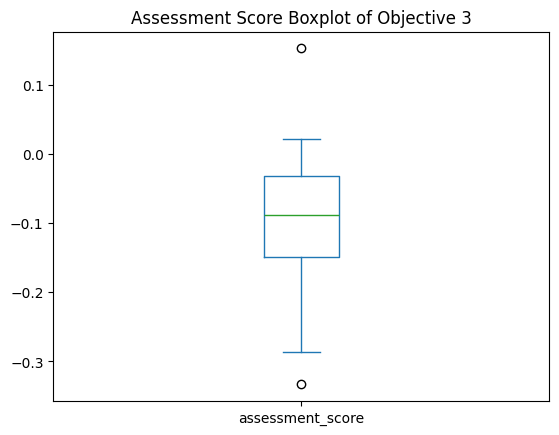

In [43]:
# make boxplot for objective 1 with respect to the assessment score
assessment_score_3 = result_3['assessment_score'].explode().reset_index(drop=True)

if len(assessment_score_3) != 0:
    assessment_score_3.plot(kind='box')
    plt.title('Assessment Score Boxplot of Objective 3')
    plt.show()
else:
    print("No data to show")

# 8. Multi-Objective Approach: 2) Goal Programming Optimization Method
## 8.1. Create Variables for Goal Programming Optimization Method

Let list down the Goals:
- Goal 1 = To minimize the idle employee
- Goal 2 = To maximize the skills score between tasks and employees
- Goal 3 = To balance the workload for each employee

Next, setting up the deviational variables:
$$
\begin{align*}
d^+_1 & : \text{Overachievement of the employee target} \\
d^-_1 & : \text{Underachievement of the employee target} \\
d^+_2 & : \text{Overachievement of the score target} \\
d^-_2 & : \text{Underachievement of the score target} \\
d^+_3 & : \text{Overachievement of the max\_workload target} \\
d^-_3 & : \text{Underachievement of the max\_workload target} \\
\end{align*}
$$

Denote that the deviational variables is non-negative value. Then, setting up Goal Priority as per relevance to the Business and Management:

| Goal                                                      | Priority         |
|-----------------------------------------------------------|------------------|
| 1) To minimize the idle employee                             | $P_3$ with $W_1$ |
| 2) To maximize the skills score between tasks and employees  | $P_1$ with $W_2$ |
| 3) To balance the workload for each employee                 | $P_2$ with $W_3$ |

We can say that our ideal conditon for each Goal is:
$$
\begin{align*}
goal_1 &= 0 \quad \tag{5} \\
goal_2 &= \text{optimal} \: \sum \text{score} \quad \tag{6} \\
goal_3 &\leq \text{max\_workload} \quad \tag{7}
\end{align*}
$$

Let's consider Underachievement of the $goal_1$ doesn't give any impact because the minimum value of deviation varable is 0, and 0 is our ideal condition. Then, consider Overachievement of the $goal_3$ doesn't give any impact because the maximum value is $\text{max\_workload}$, so the value that greater than $\text{max\_workload}$ can be ignored.

Hence, $d^-_1$ and $d^+_3$ can be omitted from the objective function. So for the final formation of Objective Function and Constraint is:
$$
\mu_{Z_4} = \text{min.} \: \sum_{n=1}^3\left[\frac{W_n \cdot \left(d_n^+ + d_n^-\right)}{\mu_{Z_n^{\ast}}}\right]
$$

subject to:
$$
\mu Z_n-d^+_n+d^-_n=\mu Z_n^{\ast }\quad \forall \:n\in Goal \quad \tag{9}
$$

### 8.1.1 Weight for Priority

In [44]:
# define weight dictionary for each objective
Weight = {
    1: 0.03,
    2: 0.9,
    3: 0.07,
}

### 8.1.2 Deviation Variables

In [45]:
# Define the deviation plus and minus variables
d_plus = {}
d_minus = {}

# Add variables for d_plus and d_minus with specific conditions
for i in range(1, 4):
    if i != 3:
        d_plus[i] = model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"d_plus_{i}")
    if i != 1:
        d_minus[i] = model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"d_minus_{i}")

# Set specific variables to zero
d_minus[1] = 0
d_plus[3] = 0

### 8.1.3 Get the Objectives and Goal for Each Objetives

In [46]:
mu_Z = {1: mu_Z_1,
        2: mu_Z_2,
		3: mu_Z_3}

mu_Z_star_obj = mu_Z_star.copy()
for i, value in mu_Z_star_obj.items():
    print(value)
    mu_Z_star_obj[i] = 1/value if value != 0 else 0    

mu_Z_star_obj

0.0
0.021527777777777868
5.0


{1: 0, 2: 46.45161290322561, 3: 0.2}

## 8.2 Set Additional Constraint $(9)$ for Multi-Objective

In [47]:
# This constraint is bound for each objective can connected with each other
for k, w in Weight.items():
    if w != 0:
        print(f"Constraint for Goal {k} Active.")
        model.addConstr(mu_Z[k] - d_plus[k] + d_minus[k] == mu_Z_star[k])

Constraint for Goal 1 Active.
Constraint for Goal 2 Active.
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Constraint for Goal 3 Active.


## 8.3 Set The Objective Model

In [48]:
# define D = sum k=1 to 3 ((W_plus_k * d_plus_k) + (W_minus_k * d_minus_k)) / mu_Z_star iterate
D = quicksum(
    ((Weight[i] * (d_plus[i] + d_minus[i])) * mu_Z_star_obj[i] for i in range(1, 4))
    )

In [49]:
# Minimize D
model.setObjective(D, GRB.MINIMIZE)

## 8.4 Solve The Model of Objective $(8)$

In [50]:
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 20.04.6 LTS")

CPU model: AMD EPYC 7763 64-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Academic license 2521640 - for non-commercial use only - registered to na___@mail.ugm.ac.id
Optimize a model with 41 rows, 120 columns and 251 nonzeros
Model fingerprint: 0xaade36ff
Model has 130 general constraints
Variable types: 4 continuous, 116 integer (115 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+00]
  Objective range  [1e-02, 4e+01]
  Bounds range     [1e+00, 8e+00]
  RHS range        [2e-02, 8e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]

MIP start from previous solve produced solution with objective 38.0281 (0.01s)
Loaded MIP start from previous solve with objective 38.0281

Presolve added 84 rows and 0 columns
Presolve removed 0 rows and 19 columns
Presolve time: 0.00s
Presolved: 125 rows, 101 co

### 8.2.1 Print The Solver Results

In [51]:
if model.status == GRB.OPTIMAL:
    print(d_plus[1].X, d_plus[2].X, d_plus[3])
    print(d_minus[1], d_minus[2].X, d_minus[3].X)

0.0 0.0 0
0 0.2667658730158714 0.0


In [52]:
for i in range(1, 4):
	print(f"Objective {i}: {mu_Z[i]}")

Objective 1: 5.0 + -1.0 y_Talent 1_P1 + -1.0 y_Talent 1_P2 + -1.0 y_Talent 1_P3 + -1.0 y_Talent 2_P1 + -1.0 y_Talent 2_P2 + -1.0 y_Talent 2_P3 + -1.0 y_Talent 3_P1 + -1.0 y_Talent 3_P2 + -1.0 y_Talent 3_P3 + -1.0 y_Talent 4_P1 + -1.0 y_Talent 4_P2 + -1.0 y_Talent 4_P3 + -1.0 y_Talent 5_P1 + -1.0 y_Talent 5_P2 + -1.0 y_Talent 5_P3
Objective 2: -0.09523809523809527 z_T2_Talent 1 + -0.10317460317460318 z_T2_Talent 2 + -0.023809523809523836 z_T2_Talent 3 + 0.023809523809523798 z_T2_Talent 4 + -0.15873015873015875 z_T2_Talent 5 + -0.3333333333333333 z_T6_Talent 1 + -0.17777777777777773 z_T6_Talent 2 + -0.08888888888888886 z_T6_Talent 3 + 0.022222222222222227 z_T6_Talent 4 + -0.12222222222222219 z_T6_Talent 5 + -0.2857142857142858 z_T8_Talent 1 + -0.1666666666666667 z_T8_Talent 2 + -0.04761904761904764 z_T8_Talent 3 + 0.05952380952380953 z_T8_Talent 4 + -0.1547619047619048 z_T8_Talent 5 + 0.0 z_T10_Talent 1 + -0.38888888888888884 z_T10_Talent 2 + -0.22222222222222218 z_T10_Talent 3 + -0.3333

In [53]:
# print the result
if model.status == GRB.OPTIMAL:
    print("Solution Found!")
    print(f"Obj. Value of MOO i.e. Deviation: {model.ObjVal}\n")

    x_hat_4 = {}
    for j in employees:
        result = get_employee_tasks(
            j, company_tasks, model, score, story_points, max_employee_workload
        )
        if len(result[1]) > 0:
            x_hat_4[j] = result
else:
    print("No Solution Found!")
    x_hat_4 = {}

Solution Found!
Obj. Value of MOO i.e. Deviation: 11.152534562211866

Task T2 assigned to Employee Talent 1
Company			: P1
Story Points		: 2
Metrics score	: -0.0952380952

Task T10 assigned to Employee Talent 1
Company			: P1
Story Points		: 3
Metrics score	: 0.0000000000

Task T5 assigned to Employee Talent 2
Company			: P3
Story Points		: 1
Metrics score	: -0.0833333333

Task T7 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Metrics score	: -0.0333333333

Task T1 assigned to Employee Talent 3
Company			: P2
Story Points		: 1
Metrics score	: -0.0312500000

Task T3 assigned to Employee Talent 3
Company			: P2
Story Points		: 3
Metrics score	: -0.0937500000

Task T9 assigned to Employee Talent 3
Company			: P2
Story Points		: 1
Metrics score	: 0.1527777778

Task T6 assigned to Employee Talent 4
Company			: P1
Story Points		: 1
Metrics score	: 0.0222222222

Task T8 assigned to Employee Talent 4
Company			: P1
Story Points		: 3
Metrics score	: 0.0595238095

Task T4 assigne

## 8.5 Show the Solver's Result

In [54]:
# Set display options
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

# show data that has positive metrics score

result_4 = pd.DataFrame.from_dict(x_hat_4, orient='index', columns=['company', 'assigned_task', 'sum_sp', 'wasted_sp', 'assessment_score'])

result_4.index.name = 'employee'
result_4

,company,assigned_task,sum_sp,wasted_sp,assessment_score
employee,,,,,
Talent 1,"[P1, P1]","[T2, T10]",5,3,"[-0.09523809523809527, 0.0]"
Talent 2,"[P3, P3]","[T5, T7]",3,5,"[-0.08333333333333337, -0.033333333333333326]"
Talent 3,"[P2, P2, P2]","[T1, T3, T9]",5,3,"[-0.03125, -0.09375, 0.1527777777777778]"
Talent 4,"[P1, P1]","[T6, T8]",4,4,"[0.022222222222222227, 0.05952380952380953]"
Talent 5,[P3],[T4],5,3,[-0.16666666666666666]


### 8.5.1 Statistics of The Objective

In [55]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat_4.keys()))
total_active_sp = sum(value[2] for value in x_hat_4.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 5
Total Active Employee		: 5	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 22
Total Active Story Points	: 22	100.00%
Total Wasted Story Points	: 0	0.00%



### 8.5.2. Distribution With Respect to the Assessment Score

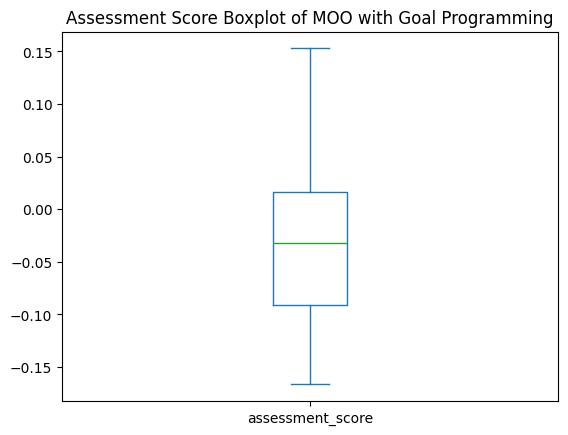

In [56]:
# make boxplot for x_hat_5
assessment_score_4 = result_4['assessment_score'].explode().reset_index(drop=True)

if len(assessment_score_4) != 0:
	assessment_score_4.plot(kind='box')
	plt.title('Assessment Score Boxplot of MOO with Goal Programming')
	plt.show()
else:
	print("No data to show")

## 8.6 Comparing MOO with Goal Programming to Single Objective

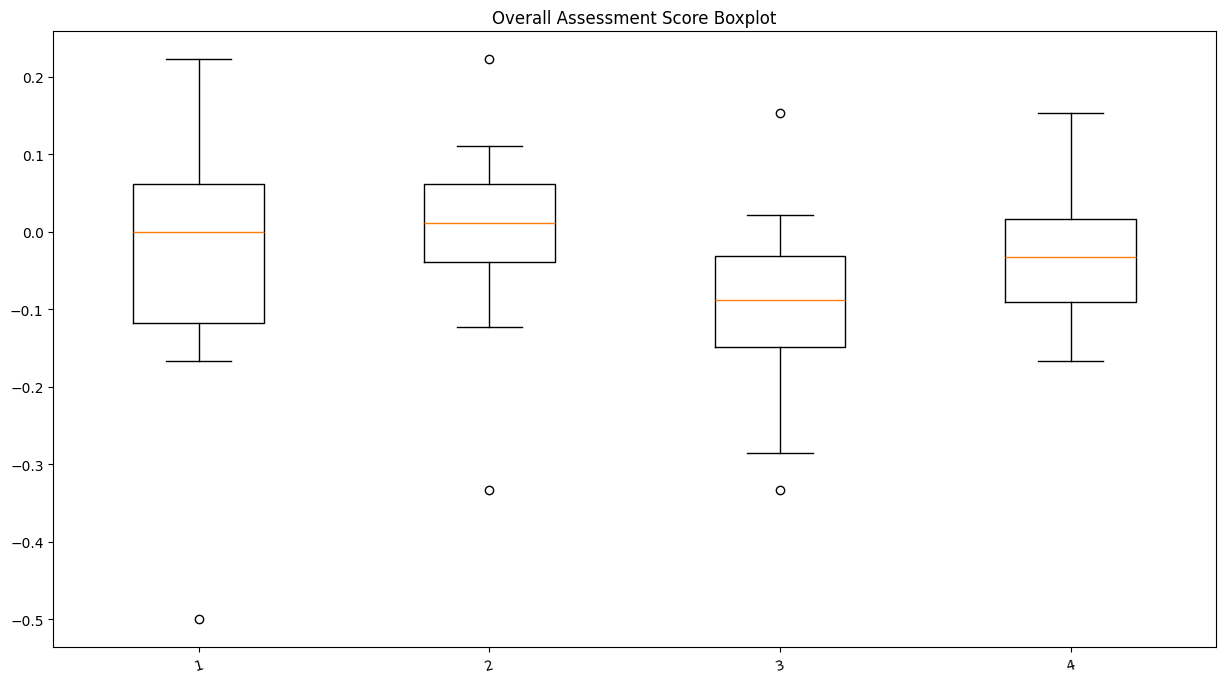

In [57]:
# merge all boxplot in one graph
data = [
    assessment_score_1,
    assessment_score_2,
    assessment_score_3,    
    assessment_score_4,
]


plt.figure(figsize=(15, 8))

plt.boxplot(
	data,
 
	label=[
		"Objective 1\nMin Idle Employee",
		"Objective 2\nMax Assessment Score",
		"Objective 3\nBalancing the Workload",		
		"MOO with\nGoal Programming",
	],

)

plt.title("Overall Assessment Score Boxplot")

plt.xticks(rotation=15)

plt.show()